In [ ]:
!wget https://archive.ics.uci.edu/static/public/848/secondary+mushroom+dataset.zip

--2024-06-14 10:38:26--  https://archive.ics.uci.edu/static/public/848/secondary+mushroom+dataset.zip
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified
Saving to: ‘secondary+mushroom+dataset.zip’

secondary+mushroom+     [   <=>              ] 462.04K   716KB/s    in 0.6s    

2024-06-14 10:38:27 (716 KB/s) - ‘secondary+mushroom+dataset.zip’ saved [473134]



In [ ]:
!unzip /content/secondary+mushroom+dataset.zip

Archive:  /content/secondary+mushroom+dataset.zip
  inflating: MushroomDataset.zip     


In [ ]:
!unzip /content/MushroomDataset.zip

Archive:  /content/MushroomDataset.zip
   creating: MushroomDataset/
  inflating: MushroomDataset/primary_data.csv  
  inflating: MushroomDataset/primary_data_meta.txt  
  inflating: MushroomDataset/secondary_data.csv  
  inflating: MushroomDataset/secondary_data_meta.txt  


In [ ]:
# noinspection PyUnusedLocal
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import StratifiedShuffleSplit, StratifiedKFold, train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline

from sklearn.metrics import accuracy_score, roc_auc_score, f1_score, precision_score, recall_score
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import make_scorer
from sklearn.preprocessing import StandardScaler, Normalizer, MinMaxScaler


from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier

# extended methods
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier

sns.set_style('whitegrid')
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

from scipy.stats import boxcox




In [ ]:
secondary_fungi_df = pd.read_table('/content/MushroomDataset/secondary_data.csv', sep = ';')
secondary_fungi_df

,class,cap-diameter,cap-shape,cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-spacing,gill-color,stem-height,...,stem-root,stem-surface,stem-color,veil-type,veil-color,has-ring,ring-type,spore-print-color,habitat,season
0,p,15.26,x,g,o,f,e,NaN,w,16.95,...,s,y,w,u,w,t,g,NaN,d,w
1,p,16.60,x,g,o,f,e,NaN,w,17.99,...,s,y,w,u,w,t,g,NaN,d,u
2,p,14.07,x,g,o,f,e,NaN,w,17.80,...,s,y,w,u,w,t,g,NaN,d,w
3,p,14.17,f,h,e,f,e,NaN,w,15.77,...,s,y,w,u,w,t,p,NaN,d,w
4,p,14.64,x,h,o,f,e,NaN,w,16.53,...,s,y,w,u,w,t,p,NaN,d,w
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61064,p,1.18,s,s,y,f,f,f,f,3.93,...,NaN,NaN,y,NaN,NaN,f,f,NaN,d,a
61065,p,1.27,f,s,y,f,f,f,f,3.18,...,NaN,NaN,y,NaN,NaN,f,f,NaN,d,a
61066,p,1.27,s,s,y,f,f,f,f,3.86,...,NaN,NaN,y,NaN,NaN,f,f,NaN,d,u
61067,p,1.24,f,s,y,f,f,f,f,3.56,...,NaN,NaN,y,NaN,NaN,f,f,NaN,d,u


In [ ]:
secondary_fungi_df.isna().sum()

class                       0
cap-diameter                0
cap-shape                   0
cap-surface             14120
cap-color                   0
does-bruise-or-bleed        0
gill-attachment          9884
gill-spacing            25063
gill-color                  0
stem-height                 0
stem-width                  0
stem-root               51538
stem-surface            38124
stem-color                  0
veil-type               57892
veil-color              53656
has-ring                    0
ring-type                2471
spore-print-color       54715
habitat                     0
season                      0
dtype: int64

In [ ]:
secondary_fungi_df.fillna('unknown', inplace=True)

In [ ]:
secondary_fungi_df.isna().sum().sum()

0

In [ ]:
secondary_fungi_df

,class,cap-diameter,cap-shape,cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-spacing,gill-color,stem-height,...,stem-root,stem-surface,stem-color,veil-type,veil-color,has-ring,ring-type,spore-print-color,habitat,season
0,p,15.26,x,g,o,f,e,unknown,w,16.95,...,s,y,w,u,w,t,g,unknown,d,w
1,p,16.60,x,g,o,f,e,unknown,w,17.99,...,s,y,w,u,w,t,g,unknown,d,u
2,p,14.07,x,g,o,f,e,unknown,w,17.80,...,s,y,w,u,w,t,g,unknown,d,w
3,p,14.17,f,h,e,f,e,unknown,w,15.77,...,s,y,w,u,w,t,p,unknown,d,w
4,p,14.64,x,h,o,f,e,unknown,w,16.53,...,s,y,w,u,w,t,p,unknown,d,w
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61064,p,1.18,s,s,y,f,f,f,f,3.93,...,unknown,unknown,y,unknown,unknown,f,f,unknown,d,a
61065,p,1.27,f,s,y,f,f,f,f,3.18,...,unknown,unknown,y,unknown,unknown,f,f,unknown,d,a
61066,p,1.27,s,s,y,f,f,f,f,3.86,...,unknown,unknown,y,unknown,unknown,f,f,unknown,d,u
61067,p,1.24,f,s,y,f,f,f,f,3.56,...,unknown,unknown,y,unknown,unknown,f,f,unknown,d,u


In [ ]:
numeric_stats = secondary_fungi_df.describe()
numeric_stats

,cap-diameter,stem-height,stem-width
count,61069.000000,61069.000000,61069.000000
mean,6.733854,6.581538,12.149410
std,5.264845,3.370017,10.035955
min,0.380000,0.000000,0.000000
25%,3.480000,4.640000,5.210000
50%,5.860000,5.950000,10.190000
75%,8.540000,7.740000,16.570000
max,62.340000,33.920000,103.910000


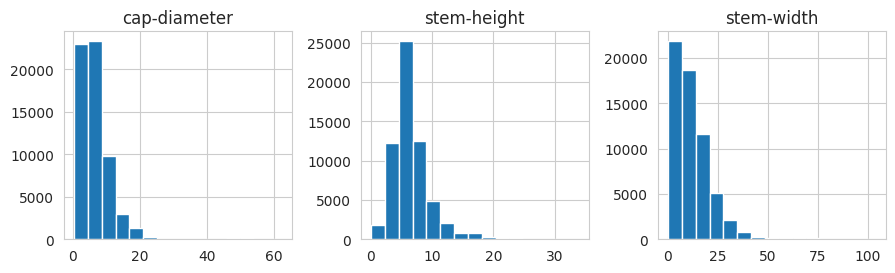

In [ ]:
secondary_fungi_df.hist(bins=15, figsize=(15, 10), layout=(4, 5))
plt.tight_layout()
plt.show()

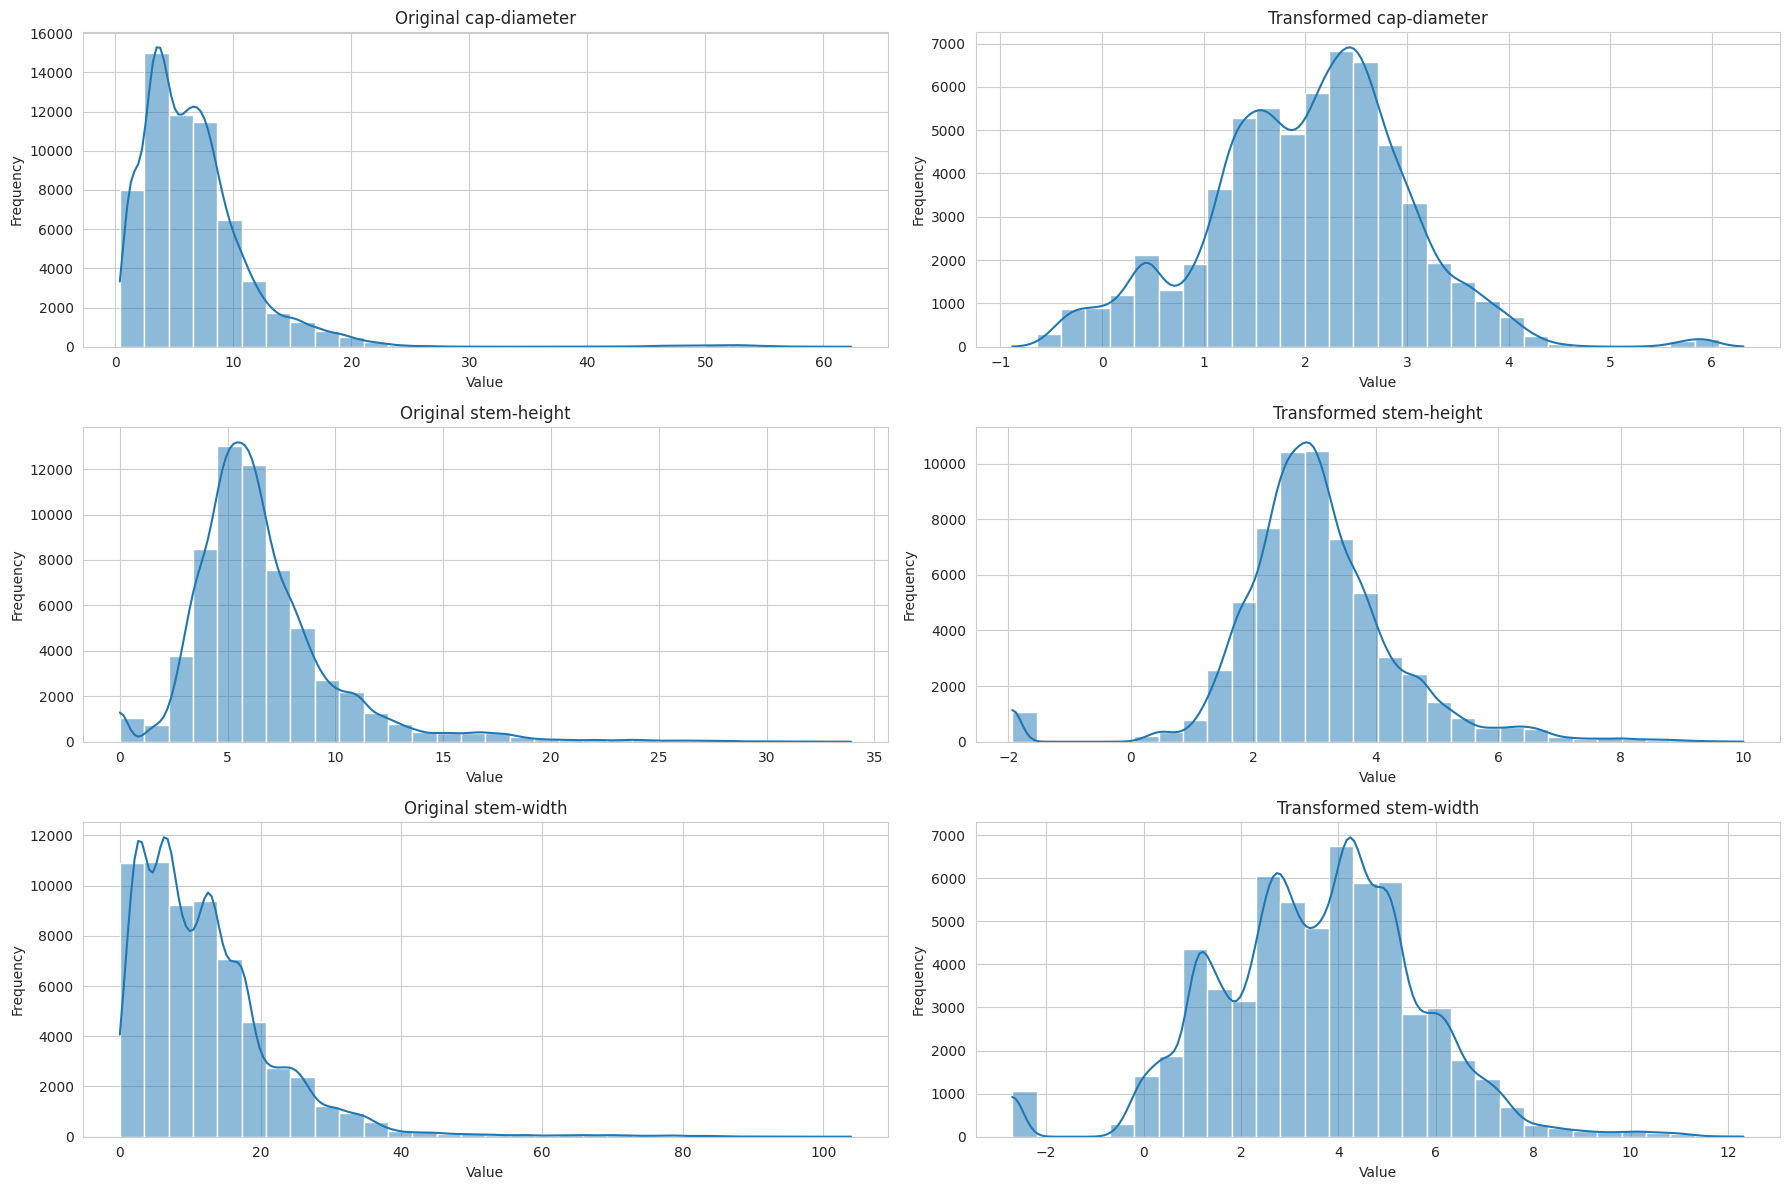

In [ ]:
numerical_features = secondary_fungi_df.select_dtypes(include=[np.number]).columns

# Apply Box-Cox transformation
data_transformed = secondary_fungi_df.copy()
for column in numerical_features:
    # Ensure all values are positive by adding a small constant if necessary
    data_transformed[column], _ = boxcox(secondary_fungi_df[column] + 1e-6)

# Visualize original vs transformed data for numerical features
plt.figure(figsize=(18, 12))

for i, column in enumerate(numerical_features, 1):
    plt.subplot(3, 2, 2*i-1)
    sns.histplot(secondary_fungi_df[column], kde=True, bins=30)
    plt.title(f'Original {column}')
    plt.xlabel('Value')
    plt.ylabel('Frequency')

    plt.subplot(3, 2, 2*i)
    sns.histplot(data_transformed[column], kde=True, bins=30)
    plt.title(f'Transformed {column}')
    plt.xlabel('Value')
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


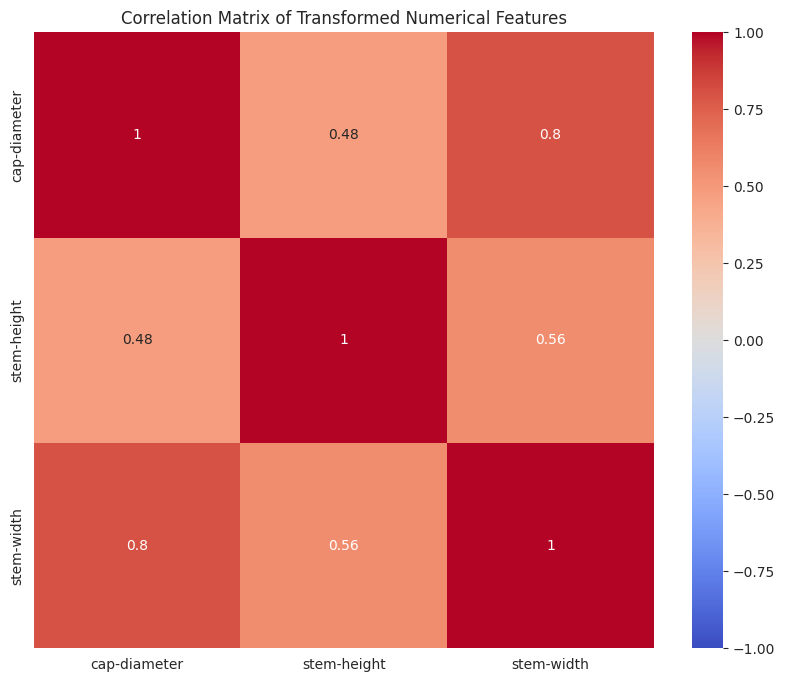

In [ ]:
# Compute the correlation matrix for the transformed numerical features
correlation_matrix = data_transformed[numerical_features].corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix of Transformed Numerical Features')
plt.show()

In [ ]:
categorical_stats = secondary_fungi_df.describe(include=['object'])
categorical_stats

,class,cap-shape,cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-spacing,gill-color,stem-root,stem-surface,stem-color,veil-type,veil-color,has-ring,ring-type,spore-print-color,habitat,season
count,61069,61069,61069,61069,61069,61069,61069,61069,61069,61069,61069,61069,61069,61069,61069,61069,61069,61069
unique,2,7,12,12,2,8,4,12,6,9,13,2,7,2,9,8,8,4
top,p,x,unknown,n,f,a,unknown,w,unknown,unknown,w,unknown,unknown,f,f,unknown,d,a
freq,33888,26934,14120,24218,50479,12698,25063,18521,51538,38124,22926,57892,53656,45890,48361,54715,44209,30177


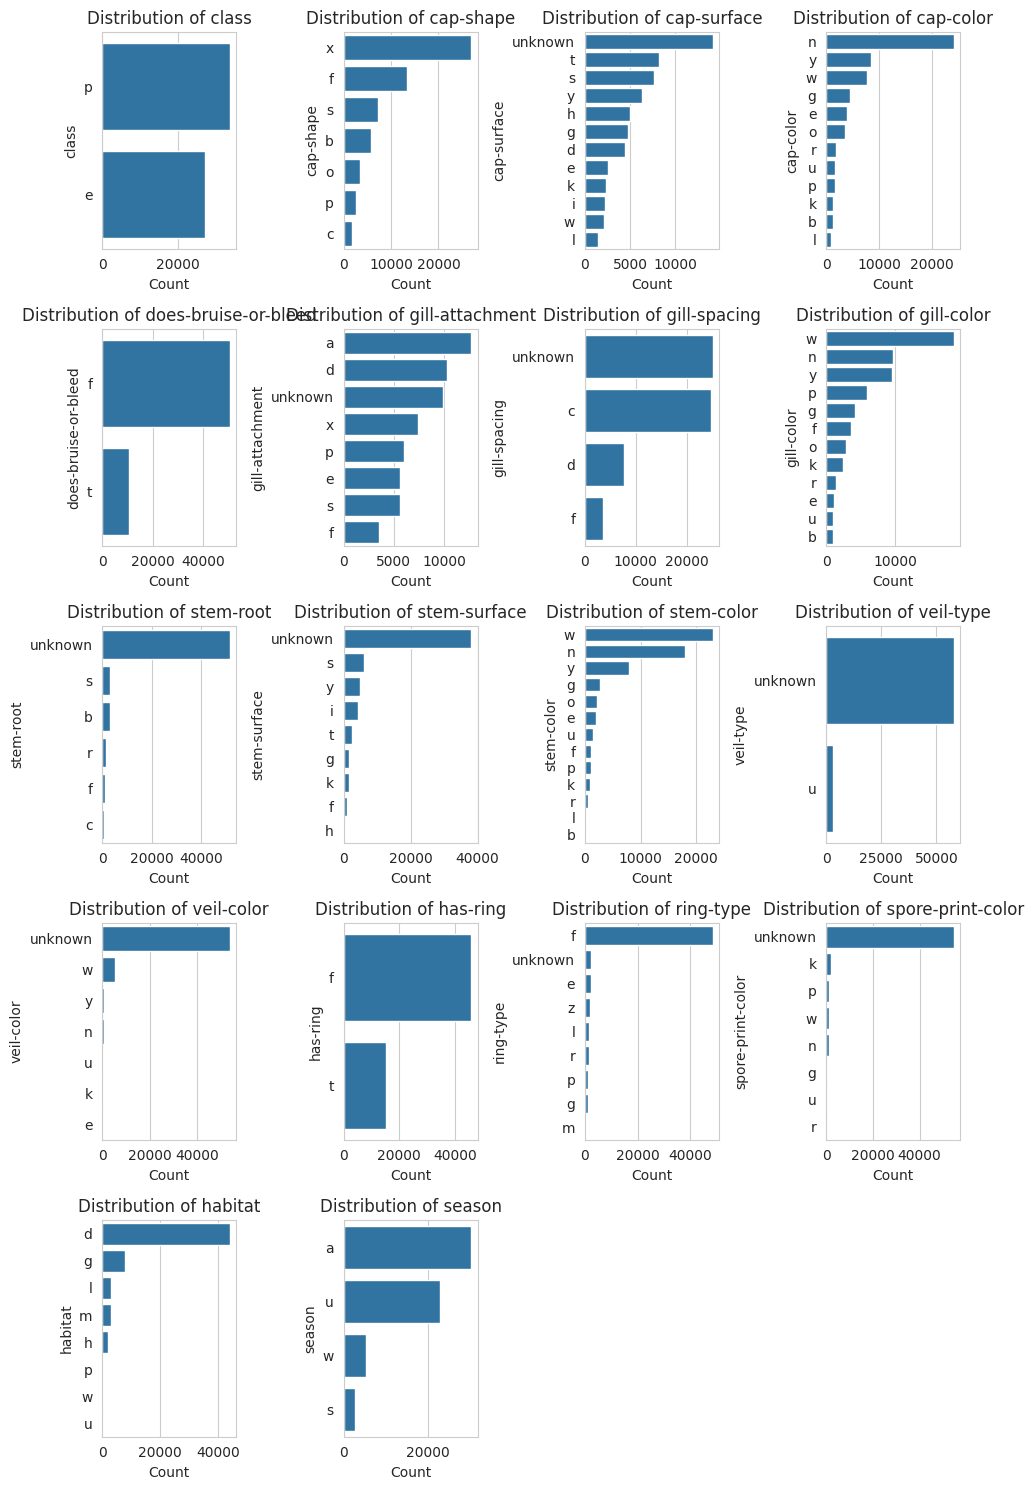

In [ ]:
categorical_columns = data_transformed.select_dtypes(include=['object']).columns
num_categorical = len(categorical_columns)
cols = 4  # Number of columns
rows = (num_categorical + cols - 1) // cols  # Number of rows

fig, axes = plt.subplots(rows, cols, figsize=(10, 3 * rows))
axes = axes.flatten()

for i, column in enumerate(categorical_columns):
    sns.countplot(data=data_transformed, y=column, order=data_transformed[column].value_counts().index, ax=axes[i])
    axes[i].set_title(f'Distribution of {column}')
    axes[i].set_xlabel('Count')
    axes[i].set_ylabel(column)

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

In [ ]:
data_transformed

,class,cap-diameter,cap-shape,cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-spacing,gill-color,stem-height,...,stem-root,stem-surface,stem-color,veil-type,veil-color,has-ring,ring-type,spore-print-color,habitat,season
0,p,3.581745,x,g,o,f,e,unknown,w,6.409170,...,s,y,w,u,w,t,g,unknown,d,w
1,p,3.725009,x,g,o,f,e,unknown,w,6.669590,...,s,y,w,u,w,t,g,unknown,d,u
2,p,3.445728,x,g,o,f,e,unknown,w,6.622569,...,s,y,w,u,w,t,g,unknown,d,w
3,p,3.457508,f,h,e,f,e,unknown,w,6.104138,...,s,y,w,u,w,t,p,unknown,d,w
4,p,3.511993,x,h,o,f,e,unknown,w,6.301814,...,s,y,w,u,w,t,p,unknown,d,w
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61064,p,0.168176,s,s,y,f,f,f,f,1.988814,...,unknown,unknown,y,unknown,unknown,f,f,unknown,d,a
61065,p,0.244593,f,s,y,f,f,f,f,1.582393,...,unknown,unknown,y,unknown,unknown,f,f,unknown,d,a
61066,p,0.244593,s,s,y,f,f,f,f,1.952570,...,unknown,unknown,y,unknown,unknown,f,f,unknown,d,u
61067,p,0.219621,f,s,y,f,f,f,f,1.793508,...,unknown,unknown,y,unknown,unknown,f,f,unknown,d,u


In [ ]:
categorical_features = data_transformed.select_dtypes(include=['object']).columns
categorical_features = categorical_features.drop('class')
data_encoded = pd.get_dummies(data_transformed, columns=categorical_features, drop_first=False)
boolean_columns = data_encoded.select_dtypes(include=['bool']).columns
data_encoded[boolean_columns] = data_encoded[boolean_columns].astype(int)
data_encoded

,class,cap-diameter,stem-height,stem-width,cap-shape_b,cap-shape_c,cap-shape_f,cap-shape_o,cap-shape_p,cap-shape_s,...,habitat_h,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w,season_a,season_s,season_u,season_w
0,p,3.581745,6.409170,5.011731,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,p,3.725009,6.669590,5.191434,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,p,3.445728,6.622569,5.118771,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,p,3.457508,6.104138,4.822831,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,p,3.511993,6.301814,5.030024,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61064,p,0.168176,1.988814,2.608826,0,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
61065,p,0.244593,1.582393,2.348905,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
61066,p,0.244593,1.952570,2.655783,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
61067,p,0.219621,1.793508,2.352340,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [ ]:
data_encoded['class'] = data_encoded['class'].replace({'p': 0, 'e': 1})
data_encoded

,class,cap-diameter,stem-height,stem-width,cap-shape_b,cap-shape_c,cap-shape_f,cap-shape_o,cap-shape_p,cap-shape_s,...,habitat_h,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w,season_a,season_s,season_u,season_w
0,0,3.581745,6.409170,5.011731,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,0,3.725009,6.669590,5.191434,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,0,3.445728,6.622569,5.118771,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,0,3.457508,6.104138,4.822831,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,0,3.511993,6.301814,5.030024,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61064,0,0.168176,1.988814,2.608826,0,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
61065,0,0.244593,1.582393,2.348905,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
61066,0,0.244593,1.952570,2.655783,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
61067,0,0.219621,1.793508,2.352340,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [ ]:
numeric_features = ['cap-diameter', 'stem-height', 'stem-width']
scaler = StandardScaler()
data_encoded[numeric_features] = scaler.fit_transform(data_encoded[numeric_features])
data_encoded

,class,cap-diameter,stem-height,stem-width,cap-shape_b,cap-shape_c,cap-shape_f,cap-shape_o,cap-shape_p,cap-shape_s,...,habitat_h,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w,season_a,season_s,season_u,season_w
0,0,1.572858,2.541285,0.699171,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,0,1.718122,2.736510,0.785841,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,0,1.434942,2.701260,0.750796,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,0,1.446887,2.312617,0.608065,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,0,1.502132,2.460806,0.707994,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61064,0,-1.888366,-0.772445,-0.459741,0,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
61065,0,-1.810883,-1.077119,-0.585100,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
61066,0,-1.810883,-0.799615,-0.437094,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
61067,0,-1.836203,-0.918857,-0.583444,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [ ]:
from sklearn.model_selection import train_test_split

# Define the feature set (X) and the target variable (y)
X = data_encoded.drop('class', axis=1)
y = data_encoded['class']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, shuffle=True)

# Display the shapes of the resulting datasets
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (42748, 128)
X_test shape: (18321, 128)
y_train shape: (42748,)
y_test shape: (18321,)


In [ ]:
def print_metrics(y_true, y_pred):
    """
    This function calculates and prints the evaluation metrics for the model predictions.

    Returns:
    None
    """
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    conf_matrix = confusion_matrix(y_true, y_pred)

    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1 Score: {f1:.4f}")
    print(f"Confusion Matrix:\n{conf_matrix}")

    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted Negative', 'Predicted Positive'], yticklabels=['Actual Negative', 'Actual Positive'])
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix')
    plt.show()

  0%|          | 0/40 [00:00<?, ?it/s]

Fitting 5 folds for each of 8 candidates, totalling 40 fits


  0%|          | 0/40 [02:27<?, ?it/s]


Logistic Regression with Grid Search and Cross-Validation Metrics:
Accuracy: 0.8667
Precision: 0.8474
Recall: 0.8521
F1 Score: 0.8498
Confusion Matrix:
[[8969 1244]
 [1199 6909]]


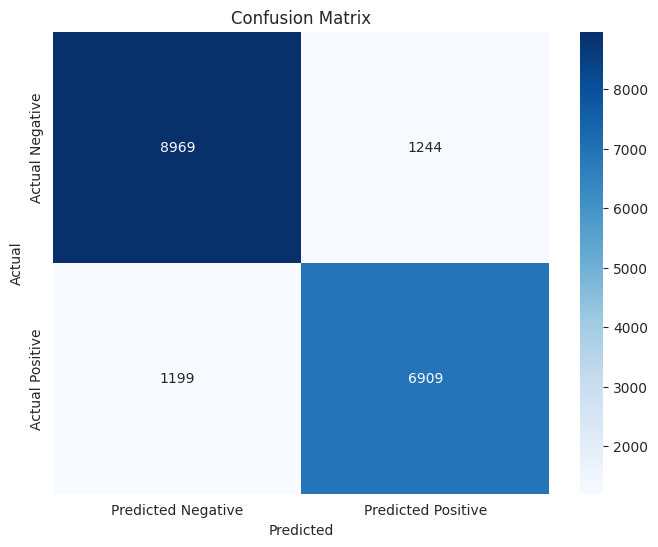

{'C': 0.1, 'penalty': 'l1', 'solver': 'liblinear'}


In [ ]:
model = LogisticRegression()

param_grid = {
    'C': [0.1, 1, 10, 100],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear']  # 'liblinear' supports both 'l1' and 'l2' penalties
}

grid_search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy', n_jobs=-1, verbose = 3)

grid_search.fit(X_train, y_train)
best_model_LR = grid_search.best_estimator_
best_params_LR = grid_search.best_params_
y_pred_LR = best_model_LR.predict(X_test)

print("Logistic Regression with Grid Search and Cross-Validation Metrics:")
print_metrics(y_test, y_pred_LR)
print(best_params_LR)


Decision Tree with Grid Search and Cross-Validation Metrics:
Accuracy: 0.9984
Precision: 0.9977
Recall: 0.9986
F1 Score: 0.9982
Confusion Matrix:
[[10194    19]
 [   11  8097]]


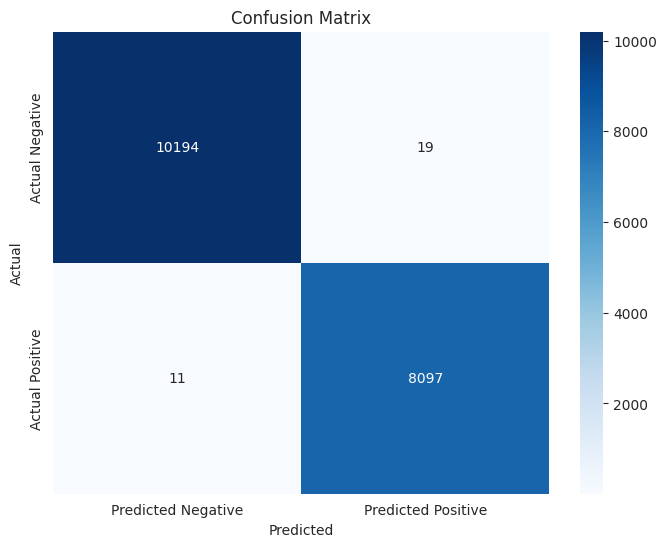

{'criterion': 'gini', 'max_depth': 50, 'min_samples_leaf': 1, 'min_samples_split': 5}


In [ ]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier(random_state=42)

param_grid = {
    'max_depth': [3, 5, 7, 10, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['gini', 'entropy']
}

grid_search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy', n_jobs=-1)

grid_search.fit(X_train, y_train)
best_model_DT = grid_search.best_estimator_
best_params_DT = grid_search.best_params_
y_pred_DT = best_model_DT.predict(X_test)

print("Decision Tree with Grid Search and Cross-Validation Metrics:")
print_metrics(y_test, y_pred_DT)
print(best_params_DT)

In [ ]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(random_state=42)

param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 3]
}

grid_search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy', n_jobs=-1, verbose = 3)
grid_search.fit(X_train, y_train)

best_model_RF = grid_search.best_estimator_
best_params_RF = grid_search.best_params_
y_pred_RF = best_model_RF.predict(X_test)

# Print the evaluation metrics
print("Random Forest with Grid Search and Cross-Validation Metrics:")
print_metrics(y_test, y_pred_RF)
print(best_params_RF)


Fitting 5 folds for each of 36 candidates, totalling 180 fits
Random Forest with Grid Search and Cross-Validation Metrics:
Accuracy: 1.0000
Precision: 1.0000
Recall: 1.0000
F1 Score: 1.0000
Confusion Matrix:
[[10213     0]
 [    0  8108]]
{'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}


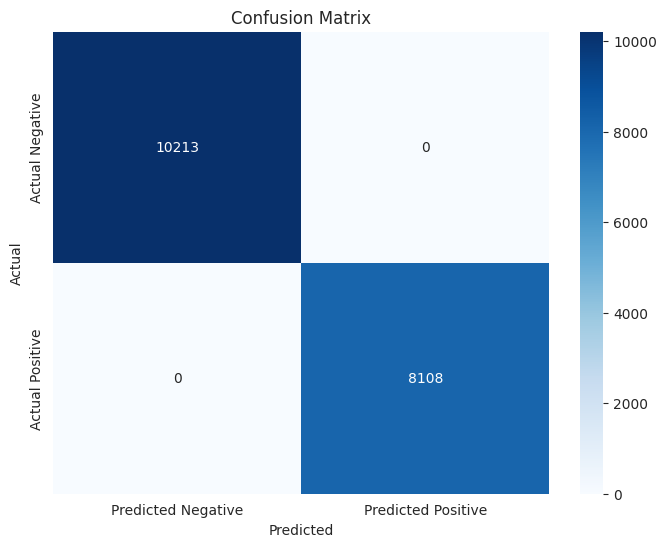

In [ ]:
conf_m = [[10213, 0], [0, 8108]]
plt.figure(figsize=(8, 6))
sns.heatmap(conf_m, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted Negative', 'Predicted Positive'], yticklabels=['Actual Negative', 'Actual Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
from sklearn.svm import SVC

model = SVC(random_state=42)
param_grid = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf', 'poly']
}

grid_search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy', n_jobs=1, verbose = 3)

grid_search.fit(X_train, y_train)
best_model_SVC = grid_search.best_estimator_
best_params_SVC = grid_search.best_params_
y_pred_SVC = best_model_SVC.predict(X_test)

# Print the evaluation metrics
print("Support Vector Machine with Grid Search and Cross-Validation Metrics:")
print_metrics(y_test, y_pred_SVC)
print(best_params_SVC)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV 1/5] END ..............C=0.1, kernel=linear;, score=0.866 total time= 1.7min
[CV 2/5] END ..............C=0.1, kernel=linear;, score=0.877 total time= 1.8min
[CV 3/5] END ..............C=0.1, kernel=linear;, score=0.868 total time= 1.4min
[CV 4/5] END ..............C=0.1, kernel=linear;, score=0.867 total time= 1.7min
[CV 5/5] END ..............C=0.1, kernel=linear;, score=0.867 total time= 1.5min
[CV 1/5] END .................C=0.1, kernel=rbf;, score=0.998 total time= 1.3min
[CV 2/5] END .................C=0.1, kernel=rbf;, score=0.998 total time= 1.4min
[CV 3/5] END .................C=0.1, kernel=rbf;, score=0.997 total time= 1.3min
[CV 4/5] END .................C=0.1, kernel=rbf;, score=0.997 total time= 1.3min
[CV 5/5] END .................C=0.1, kernel=rbf;, score=0.998 total time= 1.2min
[CV 1/5] END ................C=0.1, kernel=poly;, score=0.999 total time=  38.7s
[CV 2/5] END ................C=0.1, kernel=poly;,

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier()
param_grid = {
    'n_neighbors': [3, 5, 7, 10],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}

grid_search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy', n_jobs=1, verbose=3)
grid_search.fit(X_train, y_train)

best_model_knn = grid_search.best_estimator_
best_params_knn = grid_search.best_params_
y_pred_knn = best_model_knn.predict(X_test)

# Print the evaluation metrics
print("K-Nearest Neighbors with Grid Search and Cross-Validation Metrics:")
print_metrics(y_test, y_pred_knn)
print(best_params_knn)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV 1/5] END metric=euclidean, n_neighbors=3, weights=uniform;, score=1.000 total time=   8.2s
[CV 2/5] END metric=euclidean, n_neighbors=3, weights=uniform;, score=1.000 total time=   4.9s
[CV 3/5] END metric=euclidean, n_neighbors=3, weights=uniform;, score=1.000 total time=   3.8s
[CV 4/5] END metric=euclidean, n_neighbors=3, weights=uniform;, score=1.000 total time=   4.9s
[CV 5/5] END metric=euclidean, n_neighbors=3, weights=uniform;, score=1.000 total time=   4.6s
[CV 1/5] END metric=euclidean, n_neighbors=3, weights=distance;, score=1.000 total time=   7.0s
[CV 2/5] END metric=euclidean, n_neighbors=3, weights=distance;, score=1.000 total time=   6.0s
[CV 3/5] END metric=euclidean, n_neighbors=3, weights=distance;, score=1.000 total time=   3.3s
[CV 4/5] END metric=euclidean, n_neighbors=3, weights=distance;, score=1.000 total time=   3.0s
[CV 5/5] END metric=euclidean, n_neighbors=3, weights=distance;, score=1.000 tot

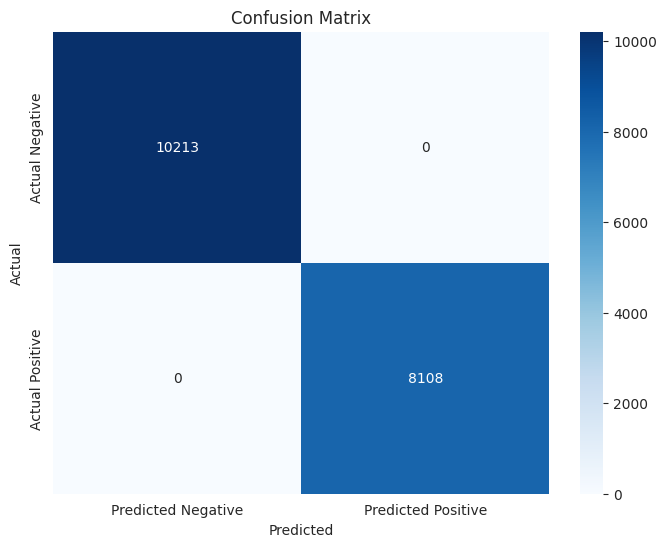

In [ ]:
conf_m = [[10213, 0], [0, 8108]]
plt.figure(figsize=(8, 6))
sns.heatmap(conf_m, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted Negative', 'Predicted Positive'], yticklabels=['Actual Negative', 'Actual Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

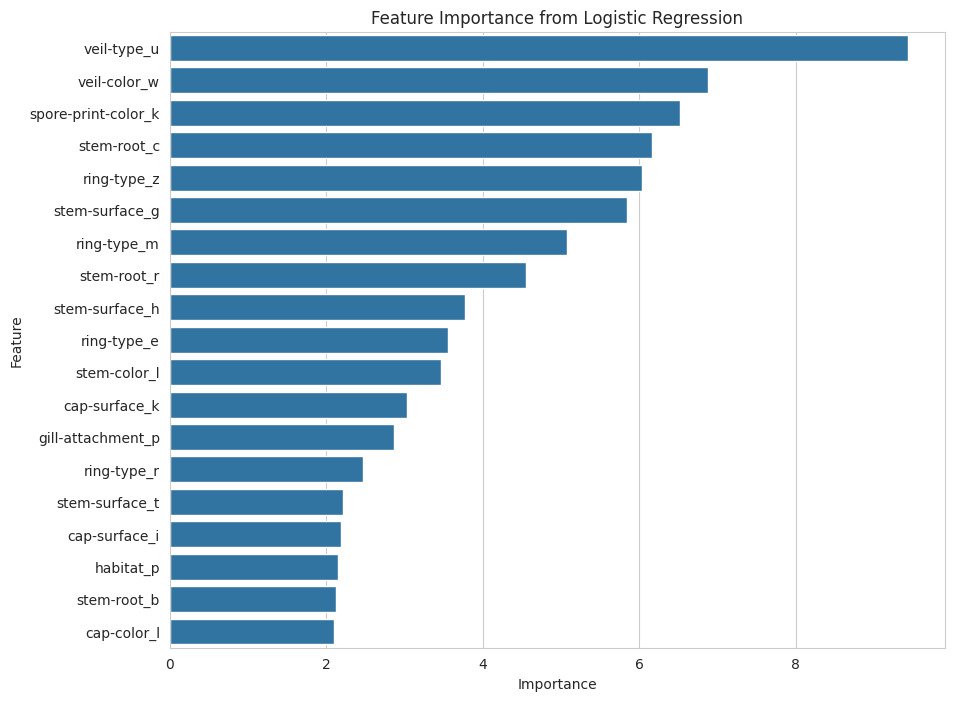

In [ ]:
importance_LR = np.abs(best_model_LR.coef_[0])
feature_importance_LR = pd.Series(importance_LR, index=X_train.columns)
#print(feature_importance_LR.sort_values(ascending=False)[1:20])
df = pd.DataFrame(list(feature_importance_LR.sort_values(ascending=False)[1:20].items()), columns=['Feature', 'Importance'])
df = df.sort_values(by='Importance', ascending=False)
#print(df)
# Plot the values
plt.figure(figsize=(10, 8))
sns.barplot(x='Importance', y='Feature', data=df)
plt.title('Feature Importance from Logistic Regression')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

gill-spacing_d          0.062004
stem-height             0.053874
stem-color_w            0.037341
stem-root_s             0.035584
cap-surface_g           0.029810
cap-shape_c             0.025107
cap-color_r             0.024701
cap-surface_s           0.024159
gill-color_y            0.023746
stem-root_r             0.023674
ring-type_z             0.023361
stem-surface_g          0.023305
cap-diameter            0.020449
stem-surface_s          0.020161
gill-attachment_p       0.018732
stem-surface_unknown    0.018655
cap-surface_unknown     0.018247
cap-surface_l           0.018102
cap-surface_e           0.017878
dtype: float64


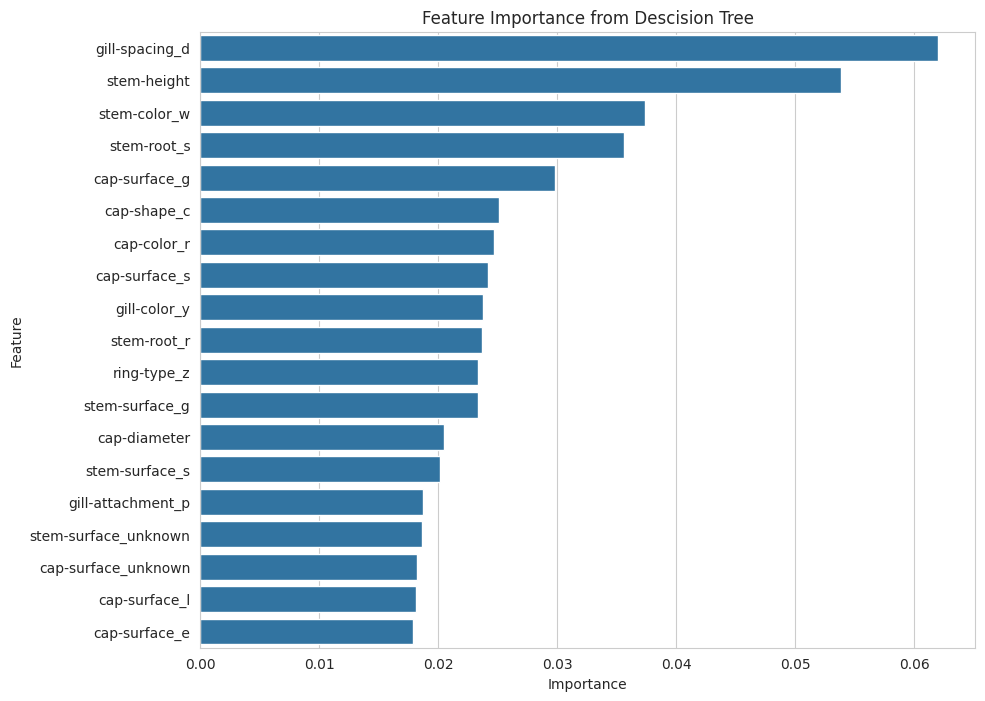

In [ ]:
importance_DT = best_model_DT.feature_importances_
feature_importance_DT = pd.Series(importance_DT, index=X_train.columns)
print(feature_importance_DT.sort_values(ascending=False)[1:20])
df = pd.DataFrame(list(feature_importance_DT.sort_values(ascending=False)[1:20].items()), columns=['Feature', 'Importance'])
df = df.sort_values(by='Importance', ascending=False)
#print(df)
# Plot the values
plt.figure(figsize=(10, 8))
sns.barplot(x='Importance', y='Feature', data=df)
plt.title('Feature Importance from Descision Tree')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

cap-diameter               0.047256
stem-height                0.046485
stem-color_w               0.034839
gill-spacing_d             0.022877
gill-spacing_c             0.020467
gill-attachment_p          0.019236
stem-surface_unknown       0.017644
ring-type_z                0.017083
gill-spacing_unknown       0.017035
gill-attachment_d          0.016590
gill-color_w               0.016506
stem-root_unknown          0.016468
does-bruise-or-bleed_t     0.015377
cap-shape_b                0.015327
stem-surface_s             0.013519
gill-attachment_unknown    0.013223
stem-root_r                0.013054
cap-color_n                0.013026
does-bruise-or-bleed_f     0.012698
dtype: float64


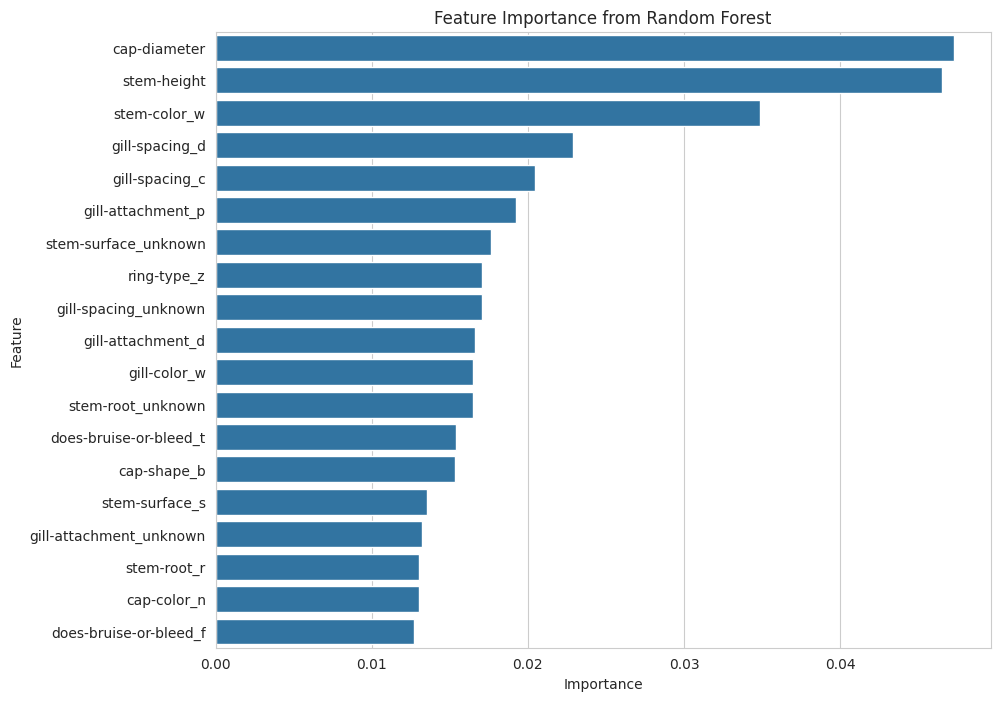

In [ ]:
importance_RF = best_model_RF.feature_importances_
feature_importance_RF = pd.Series(importance_RF, index=X_train.columns)
print(feature_importance_RF.sort_values(ascending=False)[1:20])
df = pd.DataFrame(list(feature_importance_RF.sort_values(ascending=False)[1:20].items()), columns=['Feature', 'Importance'])
df = df.sort_values(by='Importance', ascending=False)
#print(df)
# Plot the values
plt.figure(figsize=(10, 8))
sns.barplot(x='Importance', y='Feature', data=df)
plt.title('Feature Importance from Random Forest')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()